## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

from sklearn.preprocessing import StandardScaler

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


## Be sure to used Tensorflow 2.0

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [3]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

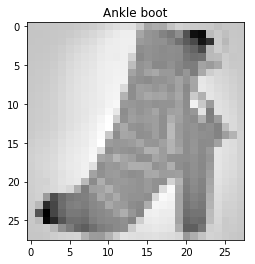

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model
![](images/simple_nn.png)

# Create the model

In [8]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(inputut_shape=[28, 28]))
# # Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.08674853 0.15965736 0.29866713 0.03620385 0.08006901 0.0308769
  0.19470453 0.06590543 0.03454056 0.01262661]] [9]


## Model Summary

In [21]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             multiple                  200960    
_________________________________________________________________
dense_19 (Dense)             multiple                  32896     
_________________________________________________________________
dense_20 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [22]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [23]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 102us/sample - loss: 1.7072 - accuracy: 0.4451 - val_loss: 1.2820 - val_accuracy: 0.6170
Epoch 2/10
8000/8000 [==============================] - 1s 67us/sample - loss: 1.1120 - accuracy: 0.6587 - val_loss: 1.0079 - val_accuracy: 0.6910
Epoch 3/10
8000/8000 [==============================] - 1s 66us/sample - loss: 0.9194 - accuracy: 0.7090 - val_loss: 0.8793 - val_accuracy: 0.7220
Epoch 4/10
8000/8000 [==============================] - 1s 64us/sample - loss: 0.8159 - accuracy: 0.7380 - val_loss: 0.8022 - val_accuracy: 0.7380
Epoch 5/10
8000/8000 [==============================] - 1s 65us/sample - loss: 0.7483 - accuracy: 0.7560 - val_loss: 0.7472 - val_accuracy: 0.7540
Epoch 6/10
8000/8000 [==============================] - 1s 65us/sample - loss: 0.6987 - accuracy: 0.7689 - val_loss: 0.7058 - val_accuracy: 0.7670
Epoch 7/10
8000/8000 [==============================] - 1s 65us/sampl

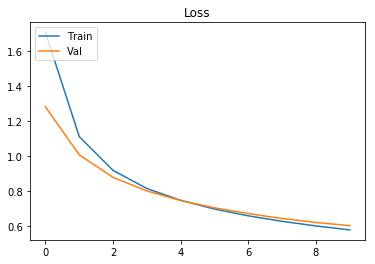

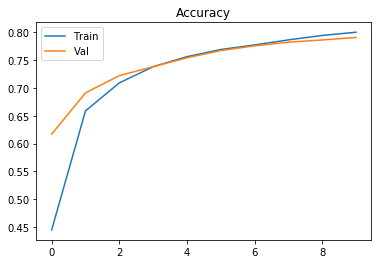

In [24]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [26]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.6233 - accuracy: 0.7810
Test Loss 0.6232863173961639
Test Accuracy 0.781
